In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [5]:
def gauss_elimination(A, b):
    n = len(A)

    # Forward elimination
    for i in range(n):
        # Pivot normalization
        pivot = A[i][i]
        if pivot == 0:
            # Find a row below to swap with
            for r in range(i+1, n):
                if A[r][i] != 0:
                    A[i], A[r] = A[r], A[i]
                    b[i], b[r] = b[r], b[i]
                    pivot = A[i][i]
                    break
            else:
                raise ValueError("Matrix is singular or no unique solution.")

        # Normalize pivot row
        for j in range(i, n):
            A[i][j] = A[i][j] / pivot
        b[i] = b[i] / pivot

        # Eliminate entries below pivot
        for k in range(i+1, n):
            factor = A[k][i]
            for j in range(i, n):
                A[k][j] = A[k][j] - factor * A[i][j]
            b[k] = b[k] - factor * b[i]

    # Back substitution
    x = [0] * n
    for i in range(n-1, -1, -1):
        sum_ax = 0
        for j in range(i+1, n):
            sum_ax += A[i][j] * x[j]
        x[i] = b[i] - sum_ax

    return x


In [6]:
A = [
    [2, 1, 1, 1, 1],
    [1, 2, 1, 1, 1],
    [1, 1, 2, 1, 1],
    [1, 1, 1, 2, 1],
    [1, 1, 1, 1, 2]
]
range(1, iter_gs
b = [1, 2, 3, 4, 5]

solution = gauss_elimination(A, b)
print("Solution:", solution)

Solution: [-1.5, -0.4999999999999998, 0.4999999999999998, 1.5, 2.5]


In [26]:
#Q2

def gauss_seidel(A, b, x0, eps=1e-2, max_iter=50):
    n = len(b)
    x = x0.copy()
    errors = []
    
    for iteration in range(max_iter):
        x_old = x.copy()
        
        for i in range(n):
            sum1 = sum(A[i, j] * x[j] for j in range(i))
            sum2 = sum(A[i, j] * x_old[j] for j in range(i + 1, n))
            
            x[i] = (b[i] - sum1 - sum2) / A[i, i]
        
        rel_error = np.linalg.norm((x - x_old) / np.where(x != 0, x, 1), ord=np.inf)
        errors.append(rel_error)
        
        if rel_error < eps:
            # Return solution, errors, and iteration count
            return x, errors, iteration + 1  # iterations counted from 1
        
    # If max iterations reached without convergence
    return x, errors, max_iter


#inputting the equations as matrix 
A = np.array([
    [24, -2860, 7.26 *1e5],
    [-2860, 7.26*1e5, -1.86472*1e8],
    [7.26*1e5, -1.86472*1e8, 5.24357*1e10]
])
b = np.array([1.057*1e-4, -1.04162*1e-2, 2.56799])
x0 = np.zeros(3)

Gauss-Seidel solution: [ 5.07425723e-06  2.23202560e-09 -1.33441619e-11] in 33 iterations


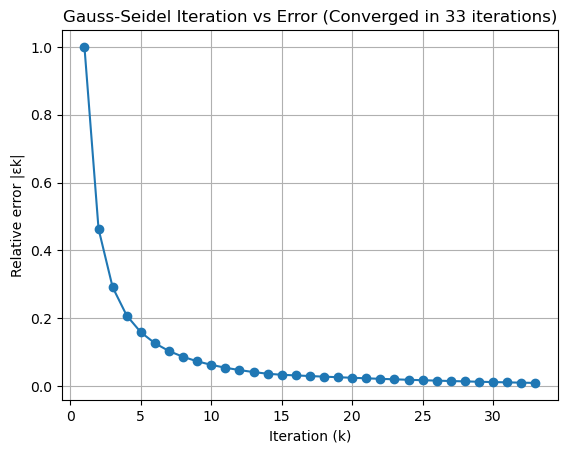

In [36]:

x_gs, errors, iter_gs = gauss_seidel(A, b, x0)

print("Gauss-Seidel solution:", x_gs, "in", iter_gs, "iterations")

plt.plot(range(1, iter_gs+1), errors, marker='o')
plt.xlabel('Iteration (k)')
plt.ylabel('Relative error |εk|')
plt.title(f'Gauss-Seidel Iteration vs Error (Converged in {iter_gs} iterations)')
plt.grid(True)
plt.show()

Gauss-Seidel solution: [ 5.07425723e-06  2.23202560e-09 -1.33441619e-11] in 33 iterations
[4.88374879e-10 2.08832510e-11 6.75032739e-14]


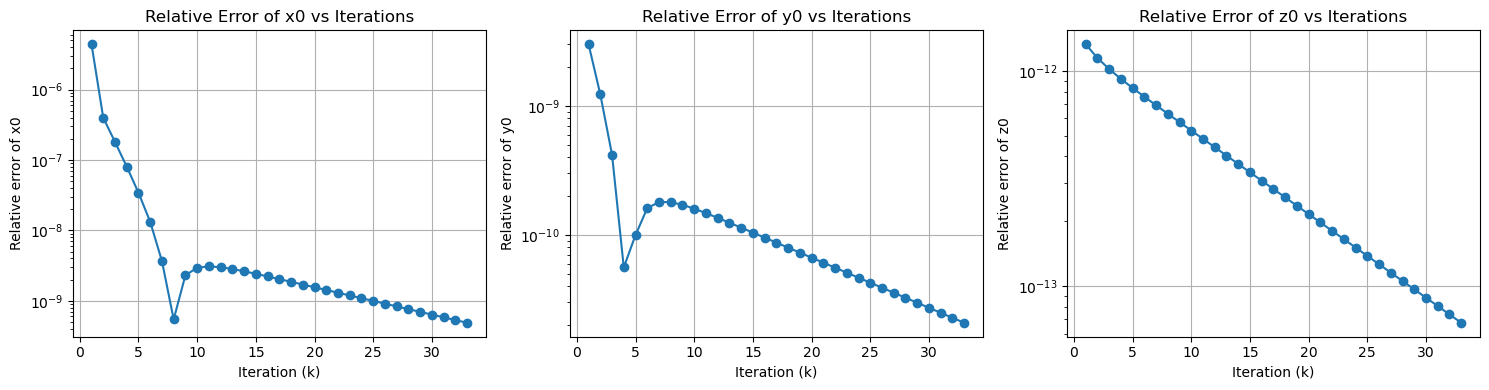

In [43]:
import numpy as np
import matplotlib.pyplot as plt

def gauss_seidel(A, b, x0, eps=1e-2, max_iter=33):
    n = len(b)
    x = x0.copy()
    errors = []  # will store relative errors for each variable per iteration
    
    for iteration in range(max_iter):
        x_old = x.copy()

        for i in range(n):
            sum1 = sum(A[i, j] * x[j] for j in range(i))
            sum2 = sum(A[i, j] * x_old[j] for j in range(i + 1, n))

            x[i] = (b[i] - sum1 - sum2) / A[i, i]

        # Compute relative error for each variable (avoid division by zero)
        rel_error_vec = np.abs((x - x_old) )
        errors.append(rel_error_vec)

        # Check convergence by max relative error among variables
       # if np.max(rel_error_vec) < eps:
        #    return x, np.array(errors), iteration + 1

    return x, np.array(errors), max_iter


# Your matrix and vectors
A = np.array([
    [24, -2860, 7.26 *1e5],
    [-2860, 7.26*1e5, -1.86472*1e8],
    [7.26*1e5, -1.86472*1e8, 5.24357*1e10]
])
b = np.array([1.057*1e-4, -1.04162*1e-2, 2.56799])
x0 = np.zeros(3)

x_gs, errors, iter_gs = gauss_seidel(A, b, x0)

print("Gauss-Seidel solution:", x_gs, "in", iter_gs, "iterations")
print(errors[32])

# errors shape is (iterations, variables)
plt.figure(figsize=(15,4))

labels = ['x0', 'y0', 'z0']
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.plot(range(1, iter_gs + 1), errors[:, i], marker='o')
    plt.xlabel('Iteration (k)')
    plt.ylabel(f'Relative error of {labels[i]}')
    plt.title(f'Relative Error of {labels[i]} vs Iterations')
    plt.yscale('log')  # log scale is often useful for errors
    plt.grid(True)

plt.tight_layout()
plt.show()
